In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly 
plotly.tools.set_credentials_file(username='manunited890300', api_key='Snr8S4I7xVvModPeJTHA')
plotly.offline.init_notebook_mode()
#from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
#from plotly.graph_objs import *


import seaborn as sns

import datetime as dt

%matplotlib inline

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
income = pd.read_csv('data/MedianHouseholdIncome2015.csv', encoding = "ISO-8859-1")

In [3]:
hs = pd.read_csv('data/PercentOver25CompletedHighSchool.csv', encoding = "ISO-8859-1")

In [4]:
pct_below_poverty = pd.read_csv('data/PercentagePeopleBelowPovertyLevel.csv', encoding = "ISO-8859-1")

In [5]:
police_killing = pd.read_csv('data/PoliceKillingsUS.csv', encoding = "ISO-8859-1")

In [6]:
income.columns = [i.replace(" ", "_") for i in income.columns]

In [7]:
income.columns = [i.lower() for i in income.columns]

In [8]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
geographic_area    29322 non-null object
city               29322 non-null object
median_income      29271 non-null object
dtypes: object(3)
memory usage: 687.3+ KB


In [9]:
income.median_income = income.median_income.replace('(X)', np.nan)
income.median_income = income.median_income.replace('-', np.nan)
income.median_income = income.median_income.replace('2,500-', '25000')
income.median_income = income.median_income.replace('250,000+', '250000')


In [10]:
income.median_income = income.median_income.astype(np.float)

In [11]:
income.head()

,geographic_area,city,median_income
0,AL,Abanda CDP,11207.0
1,AL,Abbeville city,25615.0
2,AL,Adamsville city,42575.0
3,AL,Addison town,37083.0
4,AL,Akron town,21667.0


In [12]:
income.tail()

,geographic_area,city,median_income
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523.0
29319,WY,Wright town,77114.0
29320,WY,Yoder town,37500.0
29321,WY,Y-O Ranch CDP,NaN


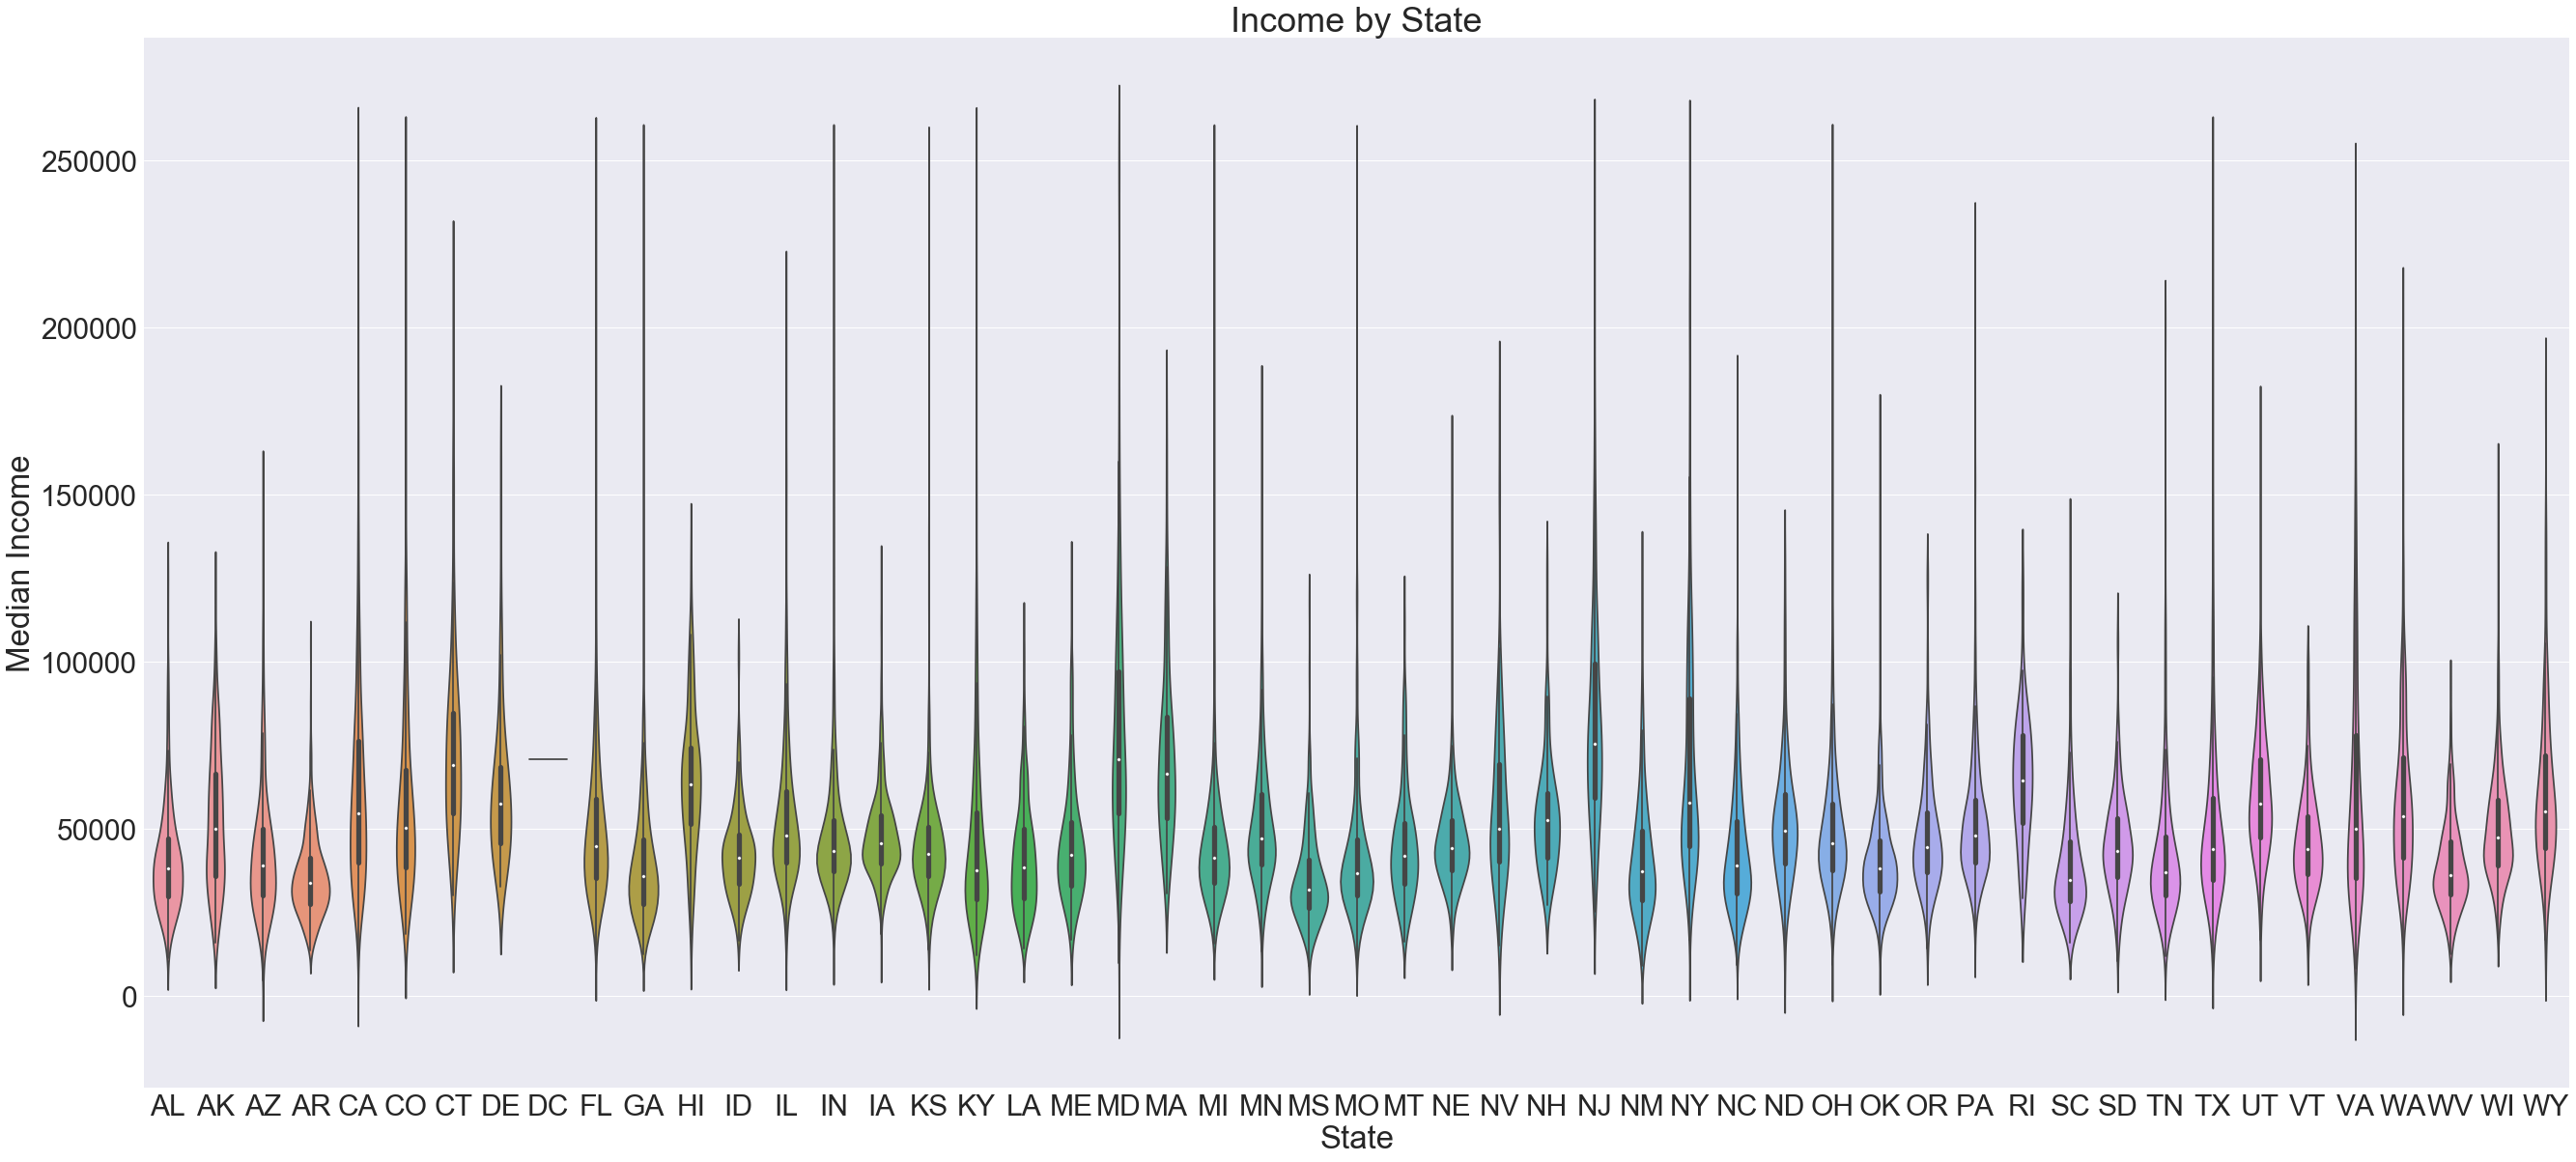

In [71]:
sns.set_context("talk")
sns.set(font_scale = 3)
plt.figure(figsize=(45,20))

fig1 = sns.violinplot(x = 'geographic_area', y = 'median_income', data=income)
#fig1 = sns.swarmplot(x = 'geographic_area', y = 'median_income', data = income, color = 'white')
fig1.set_title('Income by State')
fig1.set_xlabel('State')
fig1.set_ylabel('Median Income')

In [77]:
median_income = pd.DataFrame(income.groupby('geographic_area').median_income.median().reset_index())

In [78]:
median_income.head()

,geographic_area,median_income
0,AK,50000.0
1,AL,38304.0
2,AR,33750.0
3,AZ,39000.0
4,CA,54765.5


In [106]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = median_income['geographic_area'],
        z = median_income['median_income'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]


layout = dict(
        title = 'Median Income by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plotly.offline.iplot(fig)

## High School Completion

In [187]:
hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [188]:
hs.tail()

,Geographic Area,City,percent_completed_hs
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4
29328,WY,Y-O Ranch CDP,100


In [193]:
hs.columns = [i.replace(" ", "_") for i in hs.columns]
hs.columns = [i.lower() for i in hs.columns]

In [194]:
hs.columns

Index(['geographic_area', 'city', 'percent_completed_hs'], dtype='object')

In [197]:
hs.percent_completed_hs = hs.percent_completed_hs.replace('-', np.nan)

In [199]:
hs.percent_completed_hs = hs.percent_completed_hs.astype(np.float)

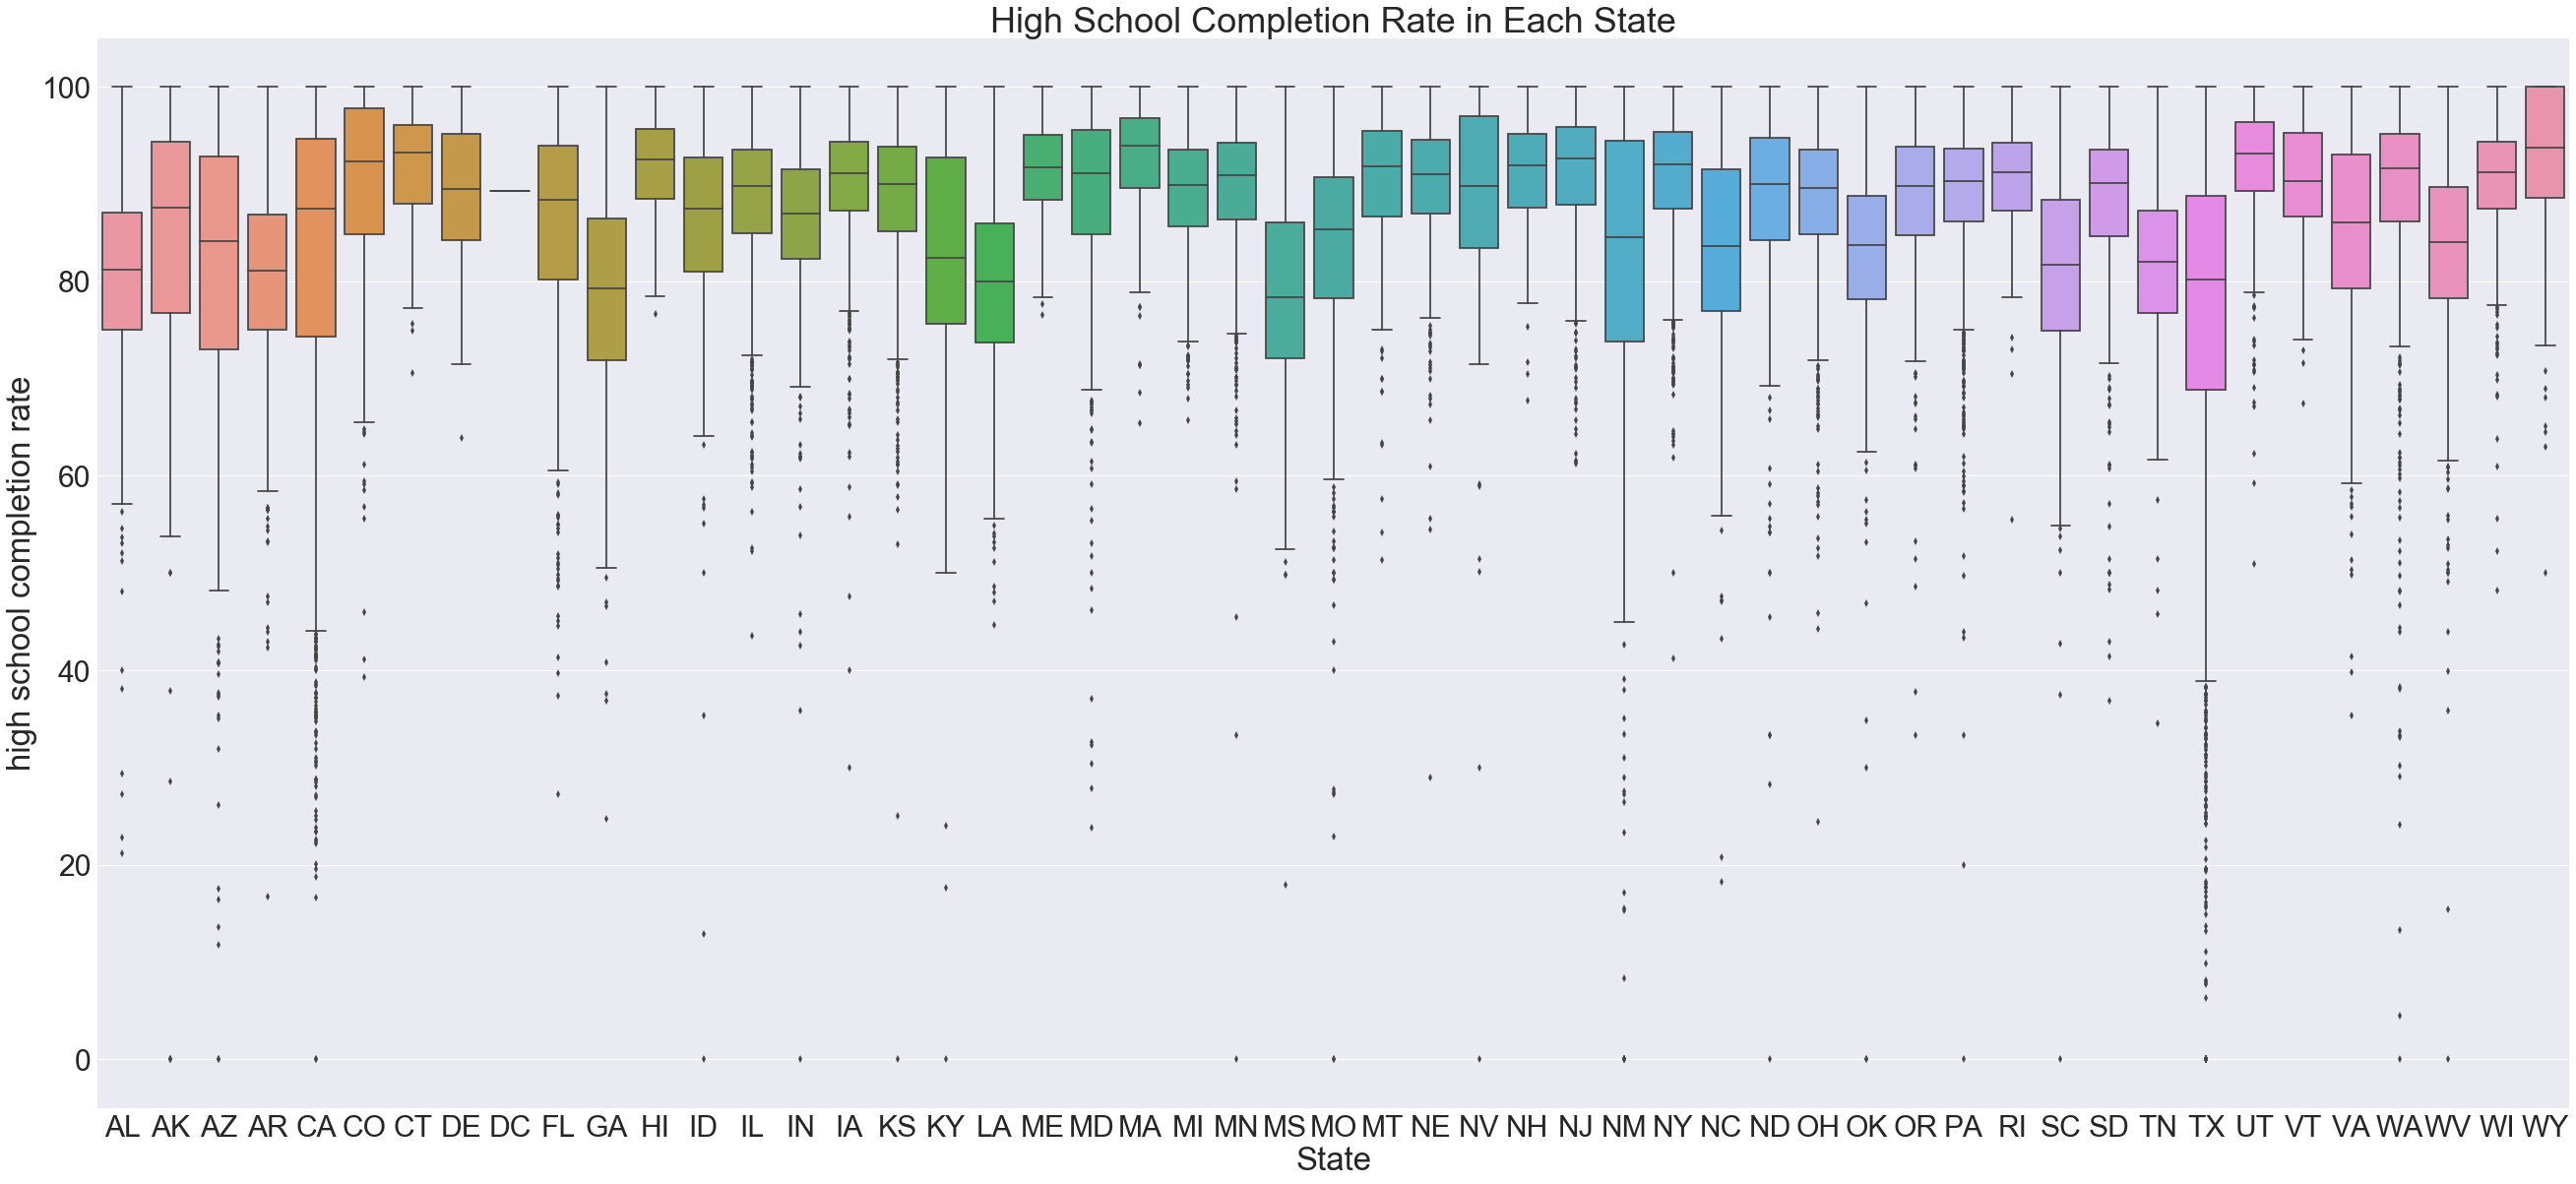

In [213]:
#sns.set_context("talk")
sns.set(font_scale = 3)
plt.figure(figsize=(45,20))

fig2 = sns.boxplot(x = 'geographic_area', y = 'percent_completed_hs', data=hs)
fig2.set_title('High School Completion Rate in Each State')
fig2.set_xlabel('State')
fig2.set_ylabel('high school completion rate')

## Poverty 

In [203]:
pct_below_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [204]:
pct_below_poverty.tail()

,Geographic Area,City,poverty_rate
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4
29328,WY,Y-O Ranch CDP,0


In [208]:
pct_below_poverty.columns = [i.replace(" ", "_").lower() for i in pct_below_poverty.columns]

In [212]:
pct_below_poverty.poverty_rate = pct_below_poverty.poverty_rate.replace('-', np.nan)
pct_below_poverty.poverty_rate = pct_below_poverty.poverty_rate.astype(np.float)

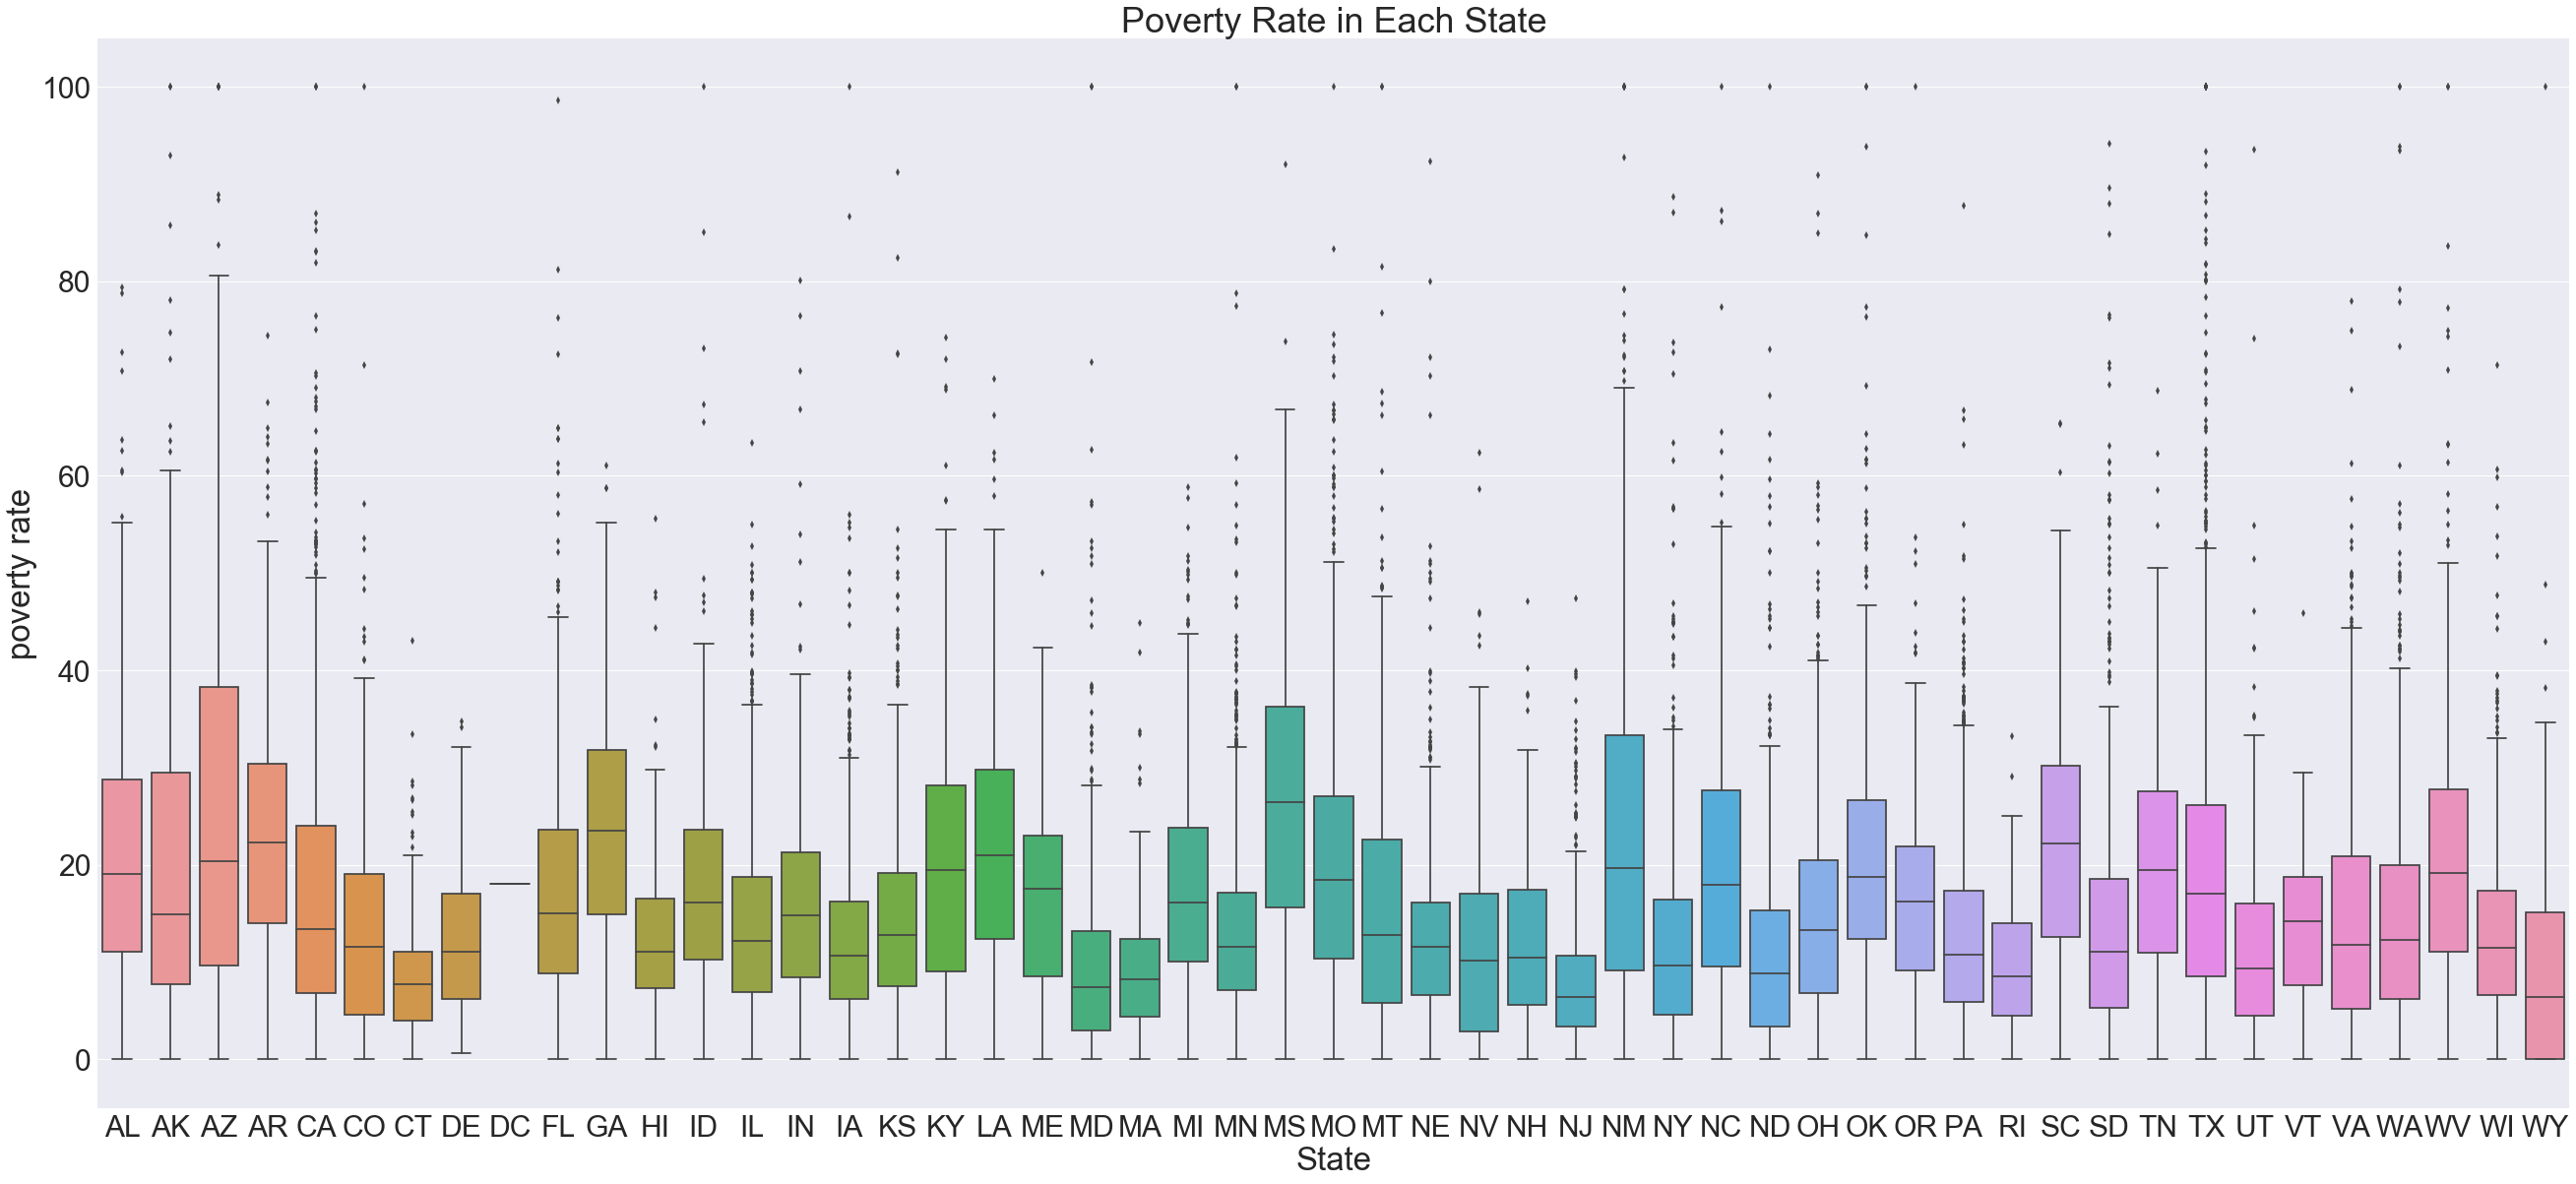

In [214]:
sns.set(font_scale = 3)
plt.figure(figsize=(45,20))

fig3 = sns.boxplot(x = 'geographic_area', y = 'poverty_rate', data=pct_below_poverty)
fig3.set_title('Poverty Rate in Each State')
fig3.set_xlabel('State')
fig3.set_ylabel('poverty rate')

## Police Killing

In [217]:
police_killing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [218]:
police_killing.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,31/07/17,shot,knife,32.0,M,B,Brooklyn,NY,True,attack,Not fleeing,False


In [219]:
police_killing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


In [221]:
police_killing.date = pd.to_datetime(police_killing.date)

In [226]:
police_killing['month_year'] = police_killing.date.dt.to_period('M')

In [230]:
killing_ts = police_killing.groupby('month_year').month_year.count()

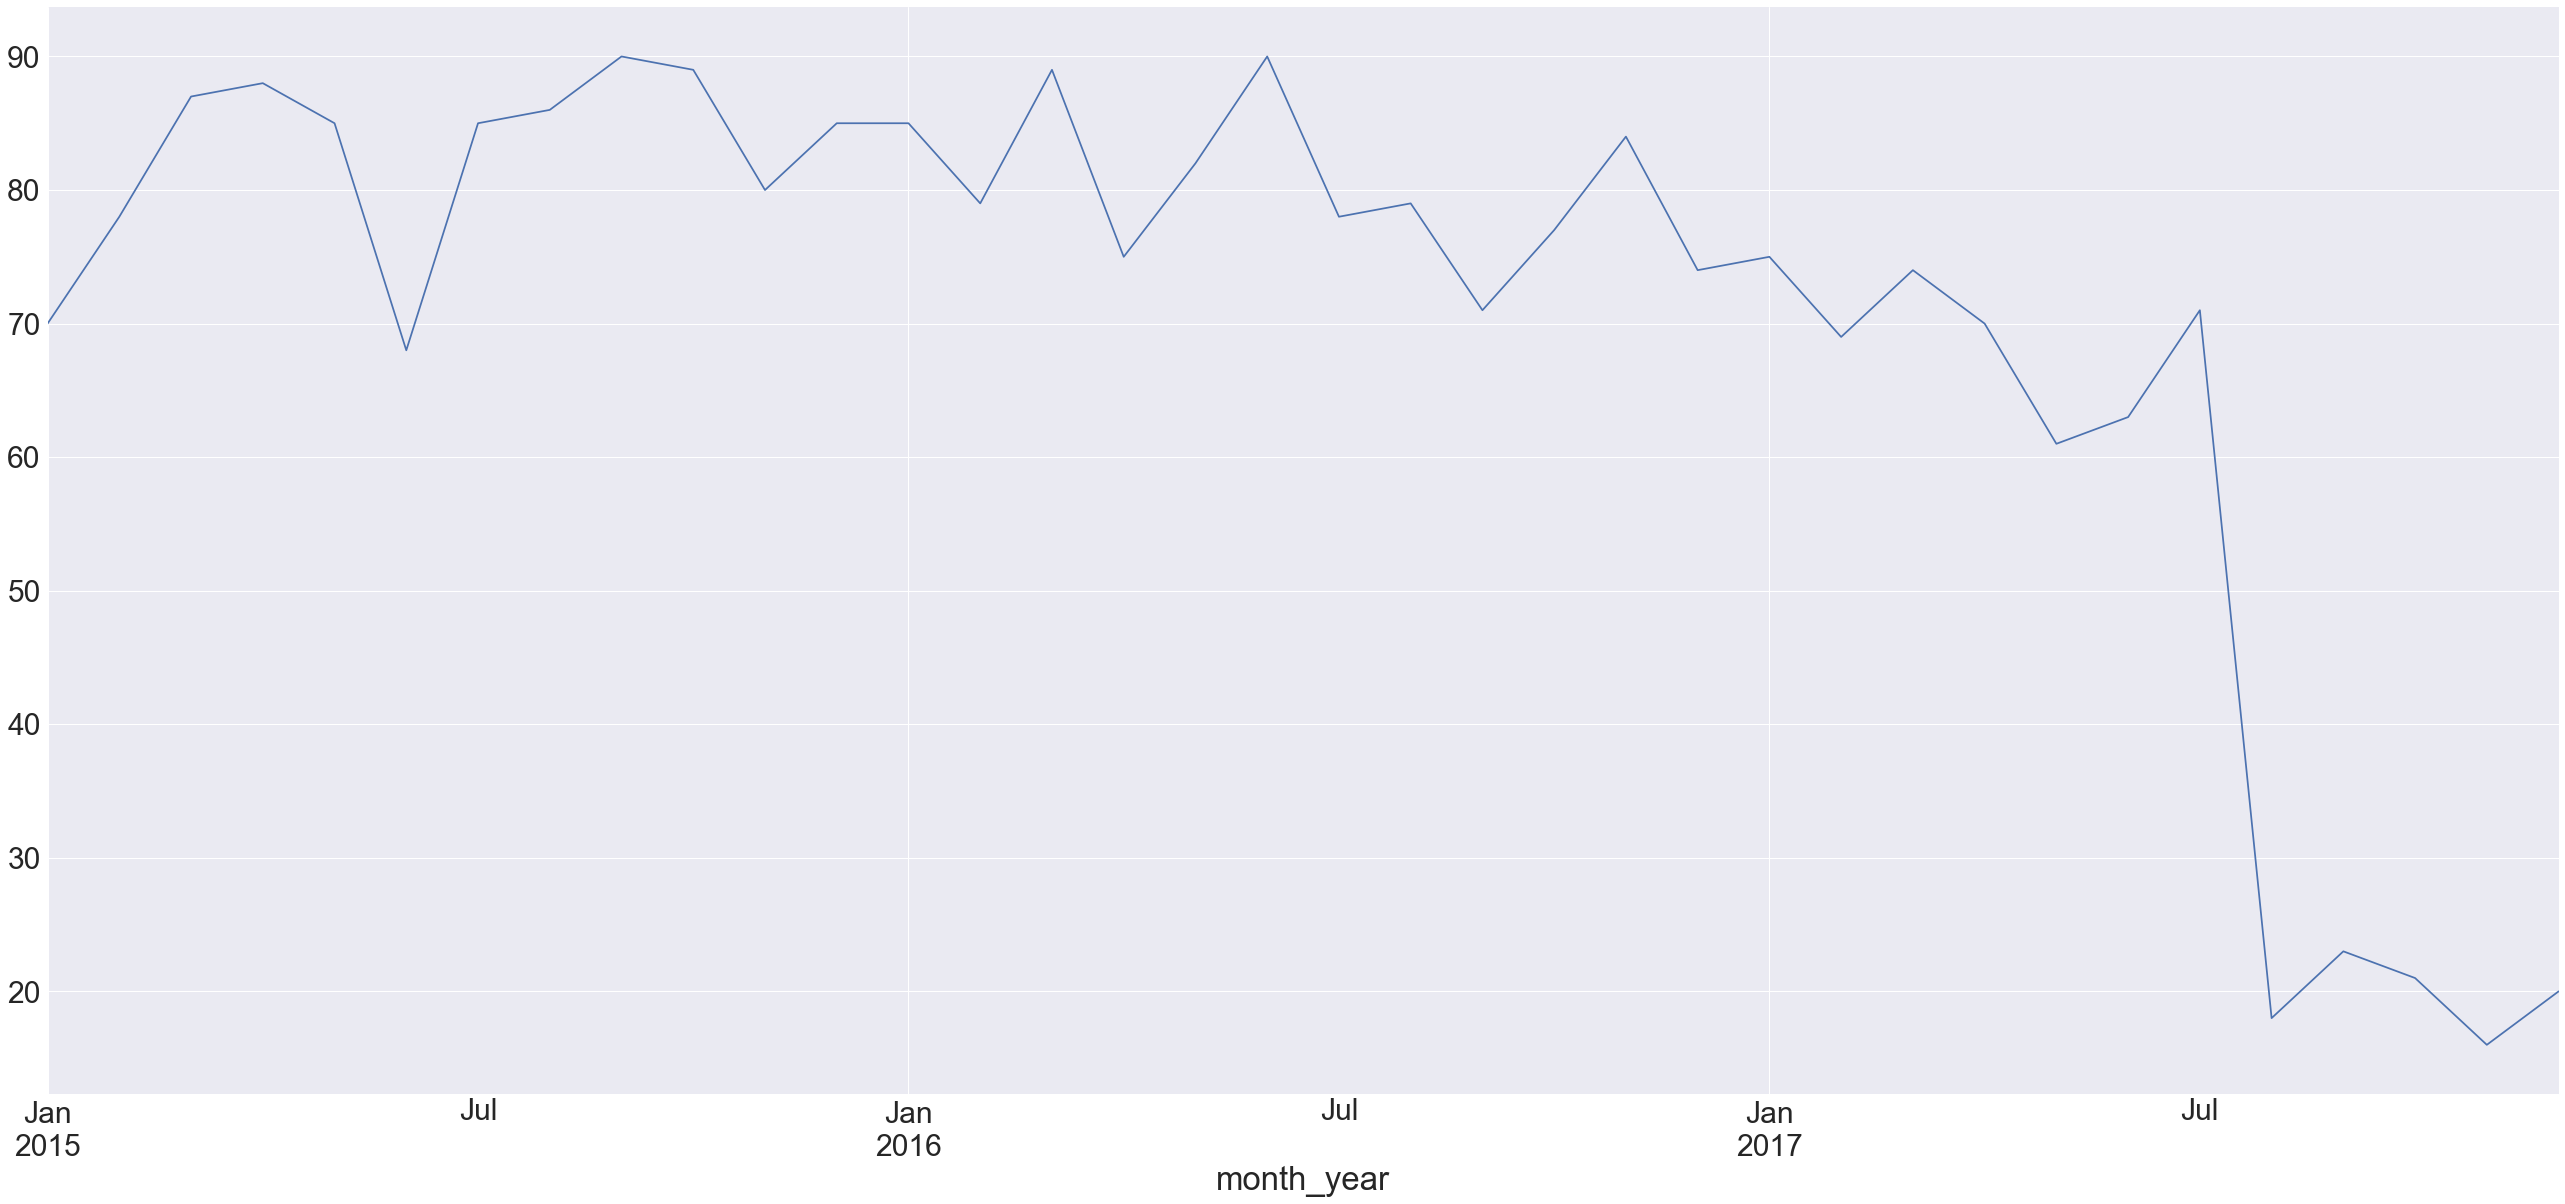

In [236]:
plt.figure(figsize=(45,20))
fig4 = killing_ts.plot()

### Manner of Death

In [248]:
police_killing.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

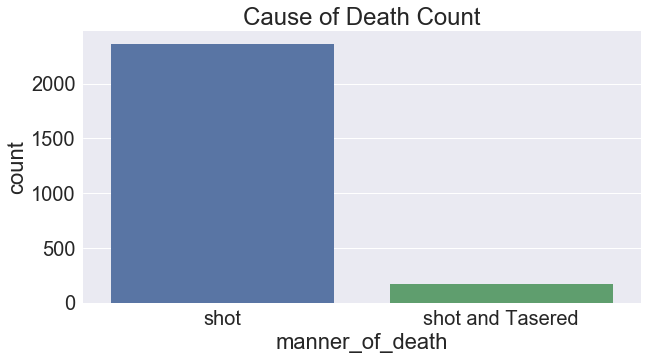

In [253]:
plt.figure(figsize= (10,5))
sns.set(font_scale = 2)
fig5 = sns.countplot(police_killing.manner_of_death)
fig5.set_title('Cause of Death Count')

### Armed

In [255]:
police_killing.armed.value_counts().head(20)

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
machete             18
unknown weapon      18
ax                   9
Taser                9
sword                8
baseball bat         8
metal pipe           7
box cutter           7
hammer               7
crossbow             6
hatchet              6
screwdriver          5
blunt object         5
gun and knife        5
Name: armed, dtype: int64

### Age Distribution

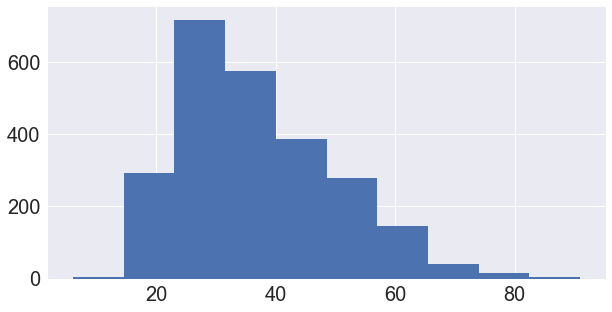

In [258]:
plt.figure(figsize=(10,5))
fig6 = police_killing.age.hist()

### Geder

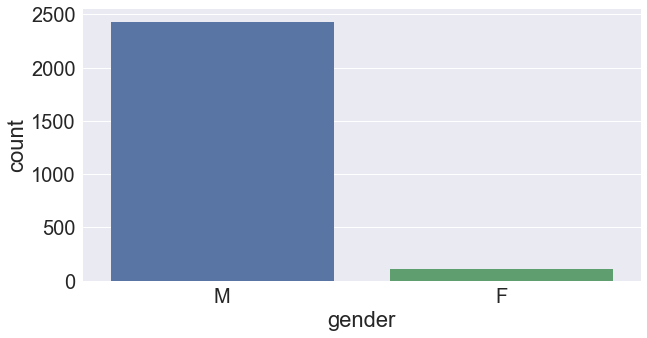

In [263]:
plt.figure(figsize=(10,5))
fig7 = sns.countplot(police_killing.gender)

### Race

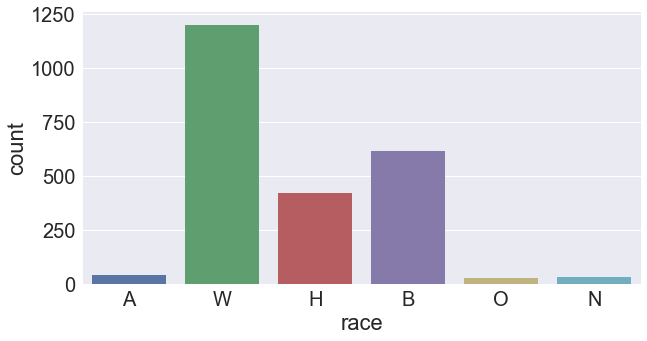

In [264]:
plt.figure(figsize=(10,5))
fig8 = sns.countplot(police_killing.race)

### State

In [275]:
police_killing.groupby('state').state.count()

state
AK     15
AL     50
AR     26
AZ    118
CA    424
CO     74
CT      9
DC     11
DE      8
FL    154
GA     70
HI     11
IA     12
ID     17
IL     62
IN     43
KS     24
KY     43
LA     57
MA     22
MD     38
ME     13
MI     37
MN     32
MO     64
MS     23
MT     11
NC     69
ND      4
NE     15
NH      7
NJ     35
NM     51
NV     42
NY     45
OH     79
OK     78
OR     38
PA     51
RI      2
SC     44
SD     10
TN     59
TX    225
UT     23
VA     47
VT      3
WA     62
WI     43
WV     27
WY      8
Name: state, dtype: int64

In [244]:
police_killing[police_killing.body_camera == True].groupby('month_year').body_camera.count()

month_year
2015-01     5
2015-02     3
2015-03     7
2015-04     9
2015-05     5
2015-06     5
2015-07     5
2015-08     8
2015-09     5
2015-10     5
2015-11     5
2015-12    12
2016-01    12
2016-02    13
2016-03    17
2016-04    12
2016-05    14
2016-06    12
2016-07     9
2016-08    12
2016-09    14
2016-10     8
2016-11     9
2016-12     6
2017-01    15
2017-02     4
2017-03    11
2017-04     6
2017-05     6
2017-06     4
2017-07     7
2017-09     1
2017-10     2
2017-11     2
2017-12     1
Freq: M, Name: body_camera, dtype: int64

In [ ]:
police_killing.